# Imports

In [1]:
%matplotlib inline
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
# if xarray doesn't work, may need to upgrade it 

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [5]:
#cp /glade/p/cgd/tss/people/oleson/clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF/lnd/hist/*h1* /glade/work/joyceyang/

In [7]:
cd /glade/work/joyceyang

/glade/work/joyceyang


In [9]:
nc1 = xr.open_dataset('clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2015-01.nc')
nc1

<xarray.Dataset>
Dimensions:             (column: 505972, gridcell: 21013, hist_interval: 2, landunit: 62100, lat: 192, levdcmp: 25, levgrnd: 25, levlak: 10, lon: 288, nvegwcs: 4, pft: 800154, time: 1)
Coordinates:
  * levgrnd             (levgrnd) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * levlak              (levlak) float32 0.05 0.6 2.1 4.6 ... 25.6 34.325 44.775
  * levdcmp             (levdcmp) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * time                (time) object 2015-02-01 00:00:00
  * lon                 (lon) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * lat                 (lat) float32 -90.0 -89.057594 ... 89.057594 90.0
Dimensions without coordinates: column, gridcell, hist_interval, landunit, nvegwcs, pft
Data variables:
    mcdate              (time) int32 ...
    mcsec               (time) int32 ...
    mdcur               (time) int32 ...
    mscur               (time) int32 ...
    nstep               (time) int32 ...
    time_bounds         (time, hist_interval) object ...
    date_written        (time) |S16 ...
    time_written        (time) |S16 ...
    area                (lat, lon) float32 ...
    landfrac            (lat, lon) float32 ...
    landmask            (lat, lon) float64 ...
    pftmask             (lat, lon) float64 ...
    nbedrock            (lat, lon) float64 ...
    grid1d_lon          (gridcell) float64 ...
    grid1d_lat          (gridcell) float64 ...
    grid1d_ixy          (gridcell) int32 ...
    grid1d_jxy          (gridcell) int32 ...
    land1d_lon          (landunit) float64 ...
    land1d_lat          (landunit) float64 ...
    land1d_ixy          (landunit) int32 ...
    land1d_jxy          (landunit) int32 ...
    land1d_wtgcell      (landunit) float64 ...
    land1d_ityplunit    (landunit) int32 ...
    land1d_active       (landunit) int32 ...
    cols1d_lon          (column) float64 ...
    cols1d_lat          (column) float64 ...
    cols1d_ixy          (column) int32 ...
    cols1d_jxy          (column) int32 ...
    cols1d_wtgcell      (column) float64 ...
    cols1d_wtlunit      (column) float64 ...
    cols1d_itype_col    (column) int32 ...
    cols1d_itype_lunit  (column) int32 ...
    cols1d_active       (column) int32 ...
    pfts1d_lon          (pft) float64 ...
    pfts1d_lat          (pft) float64 ...
    pfts1d_ixy          (pft) int32 ...
    pfts1d_jxy          (pft) int32 ...
    pfts1d_wtgcell      (pft) float64 ...
    pfts1d_wtlunit      (pft) float64 ...
    pfts1d_wtcol        (pft) float64 ...
    pfts1d_itype_veg    (pft) int32 ...
    pfts1d_itype_col    (pft) int32 ...
    pfts1d_itype_lunit  (pft) int32 ...
    pfts1d_active       (pft) int32 ...
    AGNPP               (time, pft) float32 ...
    AR                  (time, pft) float32 ...
    BTRANMN             (time, pft) float32 ...
    FCEV                (time, pft) float32 ...
    FCTR                (time, pft) float32 ...
    FGEV                (time, pft) float32 ...
    FIRA                (time, pft) float32 ...
    FIRE                (time, pft) float32 ...
    FSA                 (time, pft) float32 ...
    FSH                 (time, pft) float32 ...
    FSR                 (time, pft) float32 ...
    GPP                 (time, pft) float32 ...
    GRAINC_TO_FOOD      (time, pft) float32 ...
    GSSHALN             (time, pft) float32 ...
    GSSUNLN             (time, pft) float32 ...
    HR                  (time, column) float32 ...
    HTOP                (time, pft) float32 ...
    NFERTILIZATION      (time, pft) float32 ...
    NPP                 (time, pft) float32 ...
    NPP_NUPTAKE         (time, pft) float32 ...
    TLAI                (time, pft) float32 ...
    TOTVEGC             (time, pft) float32 ...
    TREFMNAV            (time, pft) float32 ...
    TREFMXAV            (time, pft) float32 ...
    TSA                 (time, pft) float32 ...
    TSKIN               (time, pft) float32 ...
    VEGWP               (time, nvegwcs, pft) flo

# Analysis

In [ ]:
# count values per unique lat/lon index pair
max_length = 0
for i in range(1,289):
    for j in range(1,193): # should it be 193? in the metadata it says there's 192 values but there's only 186 unique values? 
        new_length = nc1.TSA.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j).dropna(dim='pft').values.size # count unique lat/lon index pairs 
        if new_length > max_length:
            max_length = new_length

print('Maximum total unique values per lat/lon pair =', max_length)

In [12]:
tsa = nc1.TSA.where(nc1.pfts1d_itype_lunit==6)
tsa.transpose()[(nc1.pfts1d_ixy==101)&(nc1.pfts1d_jxy==1)].values.size

36

In [3]:
# find max pft for each unique lat/lon/lunit combo (VEGETATION/BARE SOIL) - if don't drop NaN values 
max_length = 0
tsa = nc1.TSA.where(nc1.pfts1d_itype_lunit==1) # only look at longitude values where the lunit type is 1 aka veg
# ^ this is the first prerequisite 
# this is a mask so it has NaN values where the land unit is not the desired type 

# now loop through each latitude/longitude combo 
for i in range(1,289):
    for j in range(1,193):
        new_length = tsa.transpose()[(nc1.pfts1d_ixy==i)&(nc1.pfts1d_jxy==j)].values.size
        #new_length = tsa.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j).dropna(dim='pft').values.size
        if new_length > max_length:
            max_length = new_length

print("Max values per unique lat/lon pair w/o dropping NaN =", max_length)

Max values per unique lat/lon pair w/o dropping NaN = 51


In [7]:
# find max pft for each unique lat/lon/lunit combo (VEGETATION/BARE SOIL) - if drop NaN values 
max_length = 0
tsa = nc1.TSA.where(nc1.pfts1d_itype_lunit==1) # only look at longitude values where the lunit type is 1 aka veg
# ^ this is the first prerequisite 
# this is a mask so it has NaN values where the land unit is not the desired type 

# now loop through each latitude/longitude combo 
for i in range(1,289):
    for j in range(1,193):
        new_length = tsa.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j).dropna(dim='pft').values.size
        if new_length > max_length:
            max_length = new_length

print("Max values per unique lat/lon pair WITH dropping NaN =", max_length)

15


In [5]:
# find max pft for each unique lat/lon/lunit combo (CROP)
# DID DROP NAN VALUES 
max_length = 0
tsa = nc1.TSA.where(nc1.pfts1d_itype_lunit==2) # only look at longitude values where the lunit type is 1 aka veg
# ^ this is the first prerequisite 
# this is a mask so it has NaN values where the land unit is not the desired type 

# now loop through each latitude/longitude combo 
for i in range(1,289):
    for j in range(1,193):
        new_length = tsa.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j).dropna(dim='pft').values.size
        if new_length > max_length:
            max_length = new_length

print('Max values per lat/lon (crop):', max_length)

Max values per lat/lon (crop): 20


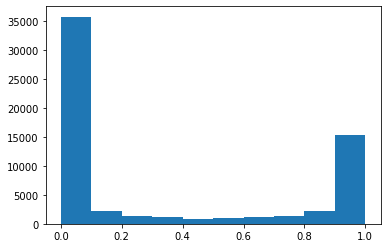

In [49]:
land1d_wtgcell = nc1.land1d_wtgcell
plt.hist(land1d_wtgcell)
plt.show()

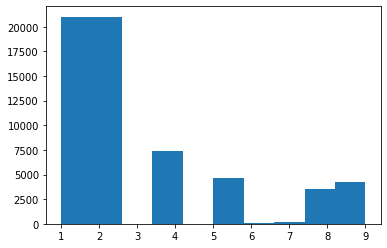

In [45]:
land1d_ityplunit = nc1.land1d_ityplunit
plt.hist(land1d_ityplunit)
plt.show()

In [50]:
mask7 = (land1d_ityplunit == 7)
print(mask7.sum())
mask8 = (land1d_ityplunit == 8)
print(mask8.sum())
mask9 = (land1d_ityplunit == 9)
print(mask9.sum())

<xarray.DataArray 'land1d_ityplunit' ()>
array(144)
<xarray.DataArray 'land1d_ityplunit' ()>
array(3516)
<xarray.DataArray 'land1d_ityplunit' ()>
array(4240)


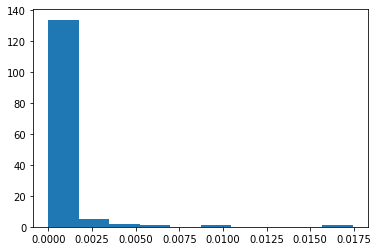

In [54]:
landwtgcell7 = land1d_wtgcell[mask7]
plt.hist(landwtgcell7)
plt.show()

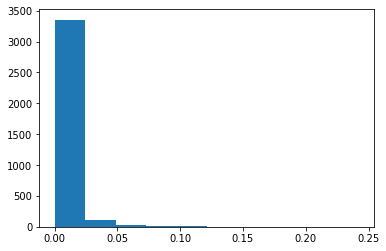

In [55]:
landwtgcell8 = land1d_wtgcell[mask8]
plt.hist(landwtgcell8)
plt.show()

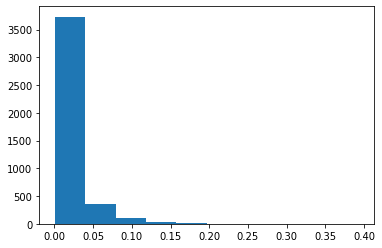

In [56]:
landwtgcell9 = land1d_wtgcell[mask9]
plt.hist(landwtgcell9)
plt.show()

# Notes to Joyce

Update "Load Files" everytime you create a new variable
Currently the variables I'm saving and reloading are the latitude/longitude grids, all the cubes, and the weighted grids 

_The creation of each cube involves approximately four steps:_ 
1. Filter for desired landunit and create "variable" 
2. Create 3D array for variable and fill in values 
3. Create 3D array of weights 
4. Verify that all total grid cell weights sum up to 0 or 1 
5. Find the weighted mean by multiplying the two previous cubes and summing over the third dimension (axis=2) and then plot 

Still need to think about how to combine TBD and MD and HD 

Current step: for each urban density class, have found the weighted mean TSA for each grid cell (result = 2D grids) 

Next Step: 
    x(i) = 2D grid of landunit weight per grid cell, i = landunit/urban density class 
    TSA(i) = 2D grid of TSA for urban density class i 
    
$$\frac{x(7)*TSA(7) + x(8)*TSA(8) + x(9)*TSA(9)} {x(7) + x(8) + x(9)}$$




# Load Files

In [ ]:
# Load previously created files 
lat_grid = np.load('lat_grid.npy')
lon_grid = np.load('lon_grid.npy')
tsa_cube_veg = np.load('tsa_cube_veg.npy')
tsa_wtlunit_cube_veg = np.load('tsa_wtlunit_cube_veg.npy')
tsa_cube_TBD = np.load('tsa_cube_TBD.npy')
tsa_wtlunit_cube_TBD = np.load('tsa_wtlunit_cube_TBD.npy')
tsa_cube_HD = np.load('tsa_cube_HD.npy')
tsa_wtlunit_cube_HD = np.load('tsa_wtlunit_cube_HD.npy')
tsa_cube_MD = np.load('tsa_cube_MD.npy')
tsa_wtlunit_cube_MD = np.load('tsa_wtlunit_cube_MD.npy')
tsa_grid_weighted_veg = np.load('tsa_grid_weighted_veg.npy')
tsa_grid_weighted_TBD = np.load('tsa_grid_weighted_TBD.npy')
tsa_grid_weighted_HD = np.load('tsa_grid_weighted_HD.npy')
tsa_grid_weighted_MD = np.load('tsa_grid_weighted_MD.npy')

# Create Lat/Lon Grid

In [11]:
# Latitude Grid 
lat_grid = np.full((288,192), float("NaN"))

for i in range(1,289): 
    for j in range(1,193):
        v = nc1.pfts1d_lat.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j).dropna(dim='pft').values
        if v.size == 0: 
            v = [float("NaN")]
        lat_grid[i-1,j-1] = v[0]
        
np.save('lat_grid', lat_grid)

In [ ]:
# Longitude Grid  
lon_grid = np.full((288,192), float("NaN"))

for i in range(1,289): 
    for j in range(1,193):
        v = nc1.pfts1d_lon.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j).dropna(dim='pft').values
        if v.size == 0: 
            v = [float("NaN")]
        lon_grid[i-1,j-1] = v[0]
        
np.save('lon_grid', lon_grid)

# Sanity Checks

In [262]:
# Sanity Check 
tsa = nc1.TSA.squeeze().where(nc1.pfts1d_itype_lunit==1)
wt = nc1.pfts1d_wtlunit.where(nc1.pfts1d_itype_lunit==1)

i = 190
j = 150
variable = tsa

vmask = (np.isnan(variable.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j)) == False)
# filter out for lat/lon pair, and where variable is not NaN 

tsa = tsa[vmask].values
wt = wt[vmask].values

print(len(tsa), len(wt))
print("Sum of weights =", sum(w))

print("TSA =", tsa)
print("TSA weight =", wt)

np.sum(tsa*wt)

9 9
Sum of weights = 1.0
TSA = [267.462   267.70444 267.73184 267.30682 267.35715 267.35687 267.32272
 267.4624  267.4624 ]
TSA weight = [6.95303995e-02 5.74370958e-02 4.96481486e-01 1.66515586e-05
 2.28165363e-03 4.11720774e-02 4.62268973e-03 2.96708130e-01
 3.17498162e-02]


267.60481504342926

In [10]:
# print unique values and counts for longitude indices
unique, counts = np.unique(nc1.pfts1d_ixy, return_counts=True)
np.asarray((unique, counts)).T[-10:]

array([[ 279, 1748],
       [ 280, 1701],
       [ 281, 2070],
       [ 282, 2567],
       [ 283, 2541],
       [ 284, 2754],
       [ 285, 2918],
       [ 286, 2965],
       [ 287, 2960],
       [ 288, 2983]])

In [27]:
# print unique values and counts - longitude
unique, counts = np.unique(nc1.pfts1d_lon, return_counts=True)
np.asarray((unique, counts)).T[-10:]

array([[ 347.5 , 1748.  ],
       [ 348.75, 1701.  ],
       [ 350.  , 2070.  ],
       [ 351.25, 2567.  ],
       [ 352.5 , 2541.  ],
       [ 353.75, 2754.  ],
       [ 355.  , 2918.  ],
       [ 356.25, 2965.  ],
       [ 357.5 , 2960.  ],
       [ 358.75, 2983.  ]])

In [3]:
# print unique values and counts - j index (latitudes)
unique, counts = np.unique(nc1.pfts1d_jxy, return_counts=True)
np.asarray((unique, counts)).T[-10:]


array([[ 177, 4542],
       [ 178, 3909],
       [ 179, 3517],
       [ 180, 3774],
       [ 181, 3660],
       [ 182, 3802],
       [ 183, 3063],
       [ 184, 2405],
       [ 185, 1253],
       [ 186,   92]])

In [29]:
# print unique values and counts - latitude
unique, counts = np.unique(nc1.pfts1d_lat, return_counts=True)
np.asarray((unique, counts)).T[-10:]

array([[  75.86387435, 4542.        ],
       [  76.80628272, 3909.        ],
       [  77.7486911 , 3517.        ],
       [  78.69109948, 3774.        ],
       [  79.63350785, 3660.        ],
       [  80.57591623, 3802.        ],
       [  81.51832461, 3063.        ],
       [  82.46073298, 2405.        ],
       [  83.40314136, 1253.        ],
       [  84.34554974,   92.        ]])

In [19]:
# itype - land unit (use to filter for veg/crop/urban)
unique, counts = np.unique(nc1.pfts1d_itype_lunit, return_counts=True)
np.asarray((unique, counts)).T

array([[     1, 315195],
       [     2, 420260],
       [     4,  20378],
       [     5,   4690],
       [     6,    131],
       [     7,    720],
       [     8,  17580],
       [     9,  21200]])

In [23]:
# active grid cells 
unique, counts = np.unique(nc1.pfts1d_active, return_counts=True)
np.asarray((unique, counts)).T

array([[     0, 600385],
       [     1, 199769]])

In [9]:
# weight - land unit
unique, counts = np.unique(nc1.pfts1d_wtlunit, return_counts=True)
np.asarray((unique, counts)).T

array([[0.00000000e+00, 5.94397000e+05],
       [6.57499827e-12, 1.00000000e+00],
       [7.99977404e-12, 1.00000000e+00],
       ...,
       [1.00000000e+00, 9.74000000e+02],
       [1.00000000e+00, 4.90000000e+01],
       [1.00000000e+00, 1.10000000e+01]])

(array([688185.,  28357.,  14022.,   9671.,   7898.,   5732.,   6497.,
          3654.,   3654.,  32484.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

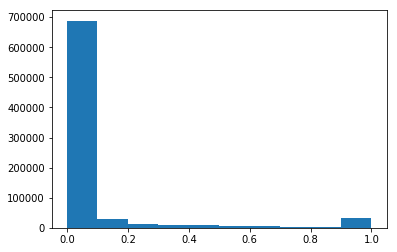

In [12]:
plt.hist(nc1.pfts1d_wtlunit)

# Vegetation/Bare Soil 

In [10]:
# Create mask for desired variable 
tsa = nc1.TSA.squeeze().where(nc1.pfts1d_itype_lunit==1)
wt = nc1.pfts1d_wtlunit.where(nc1.pfts1d_itype_lunit==1)
variable = tsa 

In [220]:
# TSA (Vegetation/Bare Soil Land Unit)
tsa_cube_veg = np.full((288,192,15), float("NaN")) 

for i in range(1,289): # because grabbing from pfts arrays, where the coordinates start from 1, not 0
    for j in range(1,193):
        vmask = (np.isnan(variable.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j)) == False)
        v = tsa[vmask].values
        for k in range(len(v)):
            tsa_cube_veg[i-1,j-1,k] = v[k]
            
np.save('tsa_cube_veg', tsa_cube_veg)

In [19]:
# TSA pft-lunit weight cube 
tsa_wtlunit_cube_veg = np.full((288,192,15), float("NaN")) 

#weights = []

for i in range(1,289): 
    for j in range(1,193):
        vmask = (np.isnan(variable.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j)) == False)
        v = wt[vmask].values
        #weights.append(sum(v))
        #print(sum(v))
        for k in range(len(v)):
            tsa_wtlunit_cube_veg[i-1,j-1,k] = v[k]

np.save('tsa_wtlunit_cube_veg', tsa_wtlunit_cube_veg)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
1.0
0.9999999999999999
1.0000000000000002
0.9999999999999997
1.0
1.0
0.9999999999999999
1.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1.0
1.0
0.9999999999999998
1.0
1.0
1.0000000000000002
1.0
1.0000000000000002
1.0
1.0
1.0
1.0000000000000002
1.0
1.0000000000000002
0.9999999999999998
0.9999999999999999
1.0
0.9999999999999999
1.0
0.9999999999999999
1.0000000000000002
1.0
0.9999999999999999
1.0
1.0
0.9999999999999997
0.9999999999999997
0.9999999999999999
0.9999999999999998
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0
0.9999999999999999
0
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
1.0
1.0000000000000002
1.0
0.9999999999999999
1.0000000000000002
1.0
1.0
0
1.0
0.9999999999999999
1.0
1.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1.0000000000000002
1

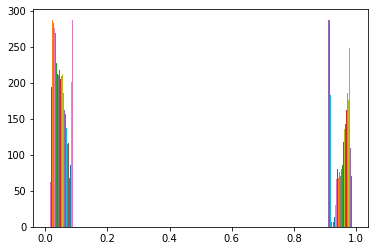

In [24]:
# Check weight cube 
x = np.nansum(tsa_wtlunit_cube, axis=2)
plt.hist(x)
plt.show()
# zero is probably for ocean, one is for land (are not all exactly 0 or 1, some are 0.9999999999 for example)

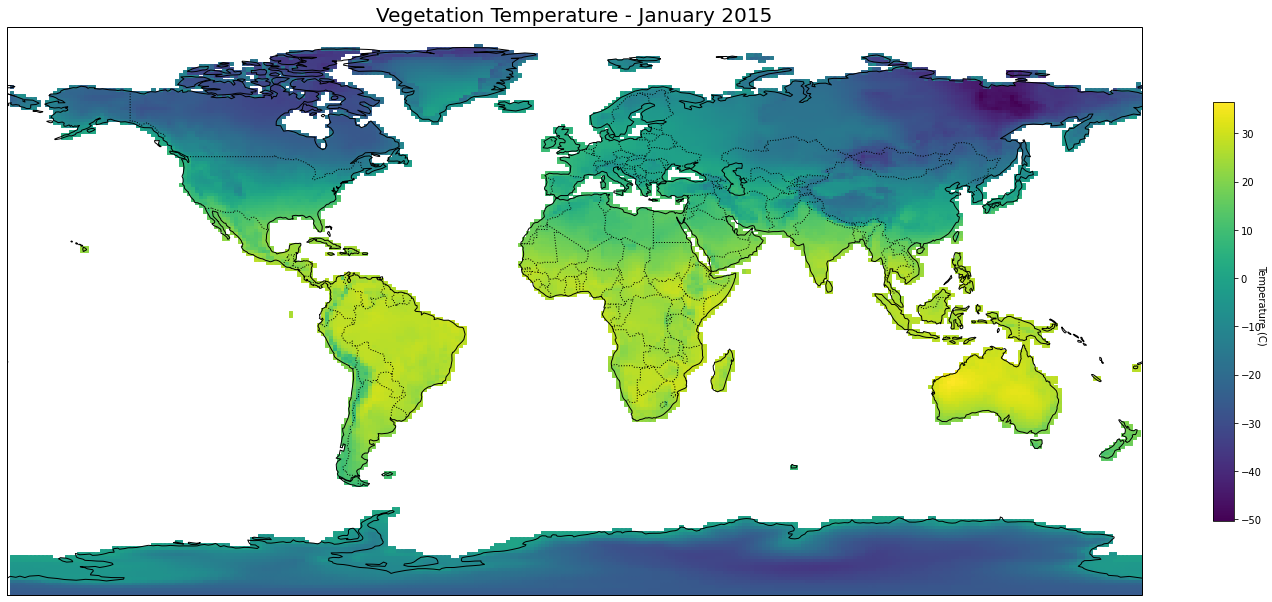

In [25]:
# Multiplied the TSA cube with the TSA weights cube and then summed (weighted mean)
fig, axes = plt.subplots(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.coastlines()

tsa_grid_weighted_veg = np.nansum((np.multiply(tsa_cube_veg, tsa_wtlunit_cube_veg)), axis=2) 
c = tsa_grid_weighted_veg - 273
np.save('tsa_grid_weighted_veg', tsa_grid_weighted_veg)

plt.scatter(lon_grid, lat_grid, c=c, transform=ccrs.PlateCarree(), s=10, marker="s")  

plt.title("Vegetation Temperature - January 2015", size=20);
cbar = plt.colorbar(shrink=0.6)
cbar.set_label('Temperature (C)    ', rotation=270)

plt.tight_layout()
plt.savefig('Vegetation_Jan2015.jpg')

# Urban Prep

@LEI I ran the three cells below and realized that there are up to 5 unique values per grid cell per urban density class - am guessing these are the 5 columns 

In [4]:
max_length = 0
tsa = nc1.TSA.where(nc1.pfts1d_itype_lunit==7) # 7 is urban TBD 
# this is a mask so it has NaN values where the land unit is not the desired type 

# now loop through each latitude/longitude combo 
for i in range(1,289):
    for j in range(1,193):
        new_length = tsa.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j).dropna(dim='pft').values.size
        if new_length > max_length:
            max_length = new_length

print("Max values per unique lat/lon pair w/o dropping NaN =", max_length)

Max values per unique lat/lon pair w/o dropping NaN = 5


In [5]:
# Urban High Density (8): Max unique values per lat/lon 
max_length = 0
tsa = nc1.TSA.where(nc1.pfts1d_itype_lunit==8) # 8 is urban HD 

for i in range(1,289):
    for j in range(1,193):
        new_length = tsa.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j).dropna(dim='pft').values.size
        if new_length > max_length:
            max_length = new_length

print("Max values per unique lat/lon pair w/o dropping NaN =", max_length)

Max values per unique lat/lon pair w/o dropping NaN = 5


In [6]:
# Urban Medium Density (9): Max unique values per lat/lon 
max_length = 0
tsa = nc1.TSA.where(nc1.pfts1d_itype_lunit==9) # 9 is urban MD 

for i in range(1,289):
    for j in range(1,193):
        new_length = tsa.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j).dropna(dim='pft').values.size
        if new_length > max_length:
            max_length = new_length

print("Max values per unique lat/lon pair w/o dropping NaN =", max_length)

Max values per unique lat/lon pair w/o dropping NaN = 5


# Urban Cube - TBD

In [7]:
# Create mask for desired variable 
tsa = nc1.TSA.squeeze().where(nc1.pfts1d_itype_lunit==7)
wt = nc1.pfts1d_wtlunit.where(nc1.pfts1d_itype_lunit==7)
variable = tsa 

In [8]:
# Urban TBD - fill in TSA values 
tsa_cube_TBD = np.full((288,192,15), float("NaN")) 

for i in range(1,289): # because grabbing from pfts arrays, where the coordinates start from 1, not 0
    for j in range(1,193):
        vmask = (np.isnan(variable.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j)) == False)
        v = tsa[vmask].values
        for k in range(len(v)):
            tsa_cube_TBD[i-1,j-1,k] = v[k]
            
np.save('tsa_cube_TBD', tsa_cube_TBD)

In [9]:
# TSA pft-lunit weight cube 
tsa_wtlunit_cube_TBD = np.full((288,192,15), float("NaN")) 

for i in range(1,289): 
    for j in range(1,193):
        vmask = (np.isnan(variable.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j)) == False)
        v = wt[vmask].values
        for k in range(len(v)):
            tsa_wtlunit_cube_TBD[i-1,j-1,k] = v[k]

np.save('tsa_wtlunit_cube_TBD', tsa_wtlunit_cube_TBD)

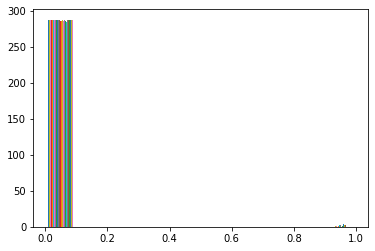

In [26]:
x = np.nansum(tsa_wtlunit_cube_TBD, axis=2)
plt.hist(x)
plt.show()
# looks about right

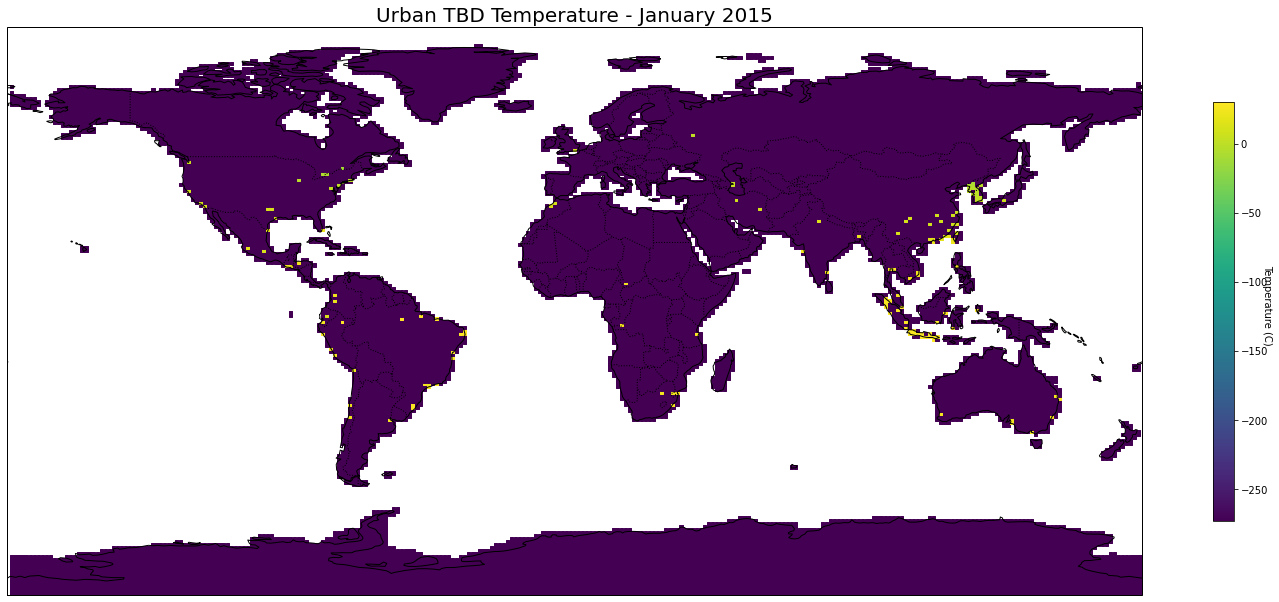

In [12]:
# Multiplied the TSA cube with the TSA weights cube and then summed (weighted mean)
fig, axes = plt.subplots(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.coastlines()

# Change these!!!!!!!!!!!
tsa_grid_weighted_TBD = np.nansum((np.multiply(tsa_cube_TBD, tsa_wtlunit_cube_TBD)), axis=2) 
c = tsa_grid_weighted_TBD - 273
np.save('tsa_grid_weighted_TBD', tsa_grid_weighted_TBD)

plt.scatter(lon_grid, lat_grid, c=c, transform=ccrs.PlateCarree(), s=10, marker="s")  

# Change Title !!!
plt.title("Urban TBD Temperature - January 2015", size=20);
cbar = plt.colorbar(shrink=0.6)
cbar.set_label('Temperature (C)    ', rotation=270)

plt.tight_layout()
plt.savefig('UrbanTBD_Jan2015.jpg')

# Urban Cube - HD 

In [13]:
# Create mask for desired variable 
tsa = nc1.TSA.squeeze().where(nc1.pfts1d_itype_lunit==8)
wt = nc1.pfts1d_wtlunit.where(nc1.pfts1d_itype_lunit==8)
variable = tsa 

In [14]:
# Urban HD - fill in TSA values 
tsa_cube_HD = np.full((288,192,15), float("NaN")) 

for i in range(1,289): 
    for j in range(1,193):
        vmask = (np.isnan(variable.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j)) == False)
        v = tsa[vmask].values
        for k in range(len(v)):
            tsa_cube_HD[i-1,j-1,k] = v[k]
            
np.save('tsa_cube_HD', tsa_cube_HD)

In [15]:
# TSA pft-lunit weight cube 
tsa_wtlunit_cube_HD = np.full((288,192,15), float("NaN")) 

for i in range(1,289): 
    for j in range(1,193):
        vmask = (np.isnan(variable.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j)) == False)
        v = wt[vmask].values
        for k in range(len(v)):
            tsa_wtlunit_cube_HD[i-1,j-1,k] = v[k]

np.save('tsa_wtlunit_cube_HD', tsa_wtlunit_cube_HD)

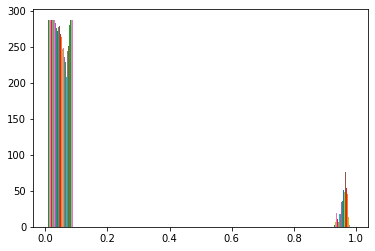

In [28]:
x = np.nansum(tsa_wtlunit_cube_HD, axis=2)
plt.hist(x)
plt.show()

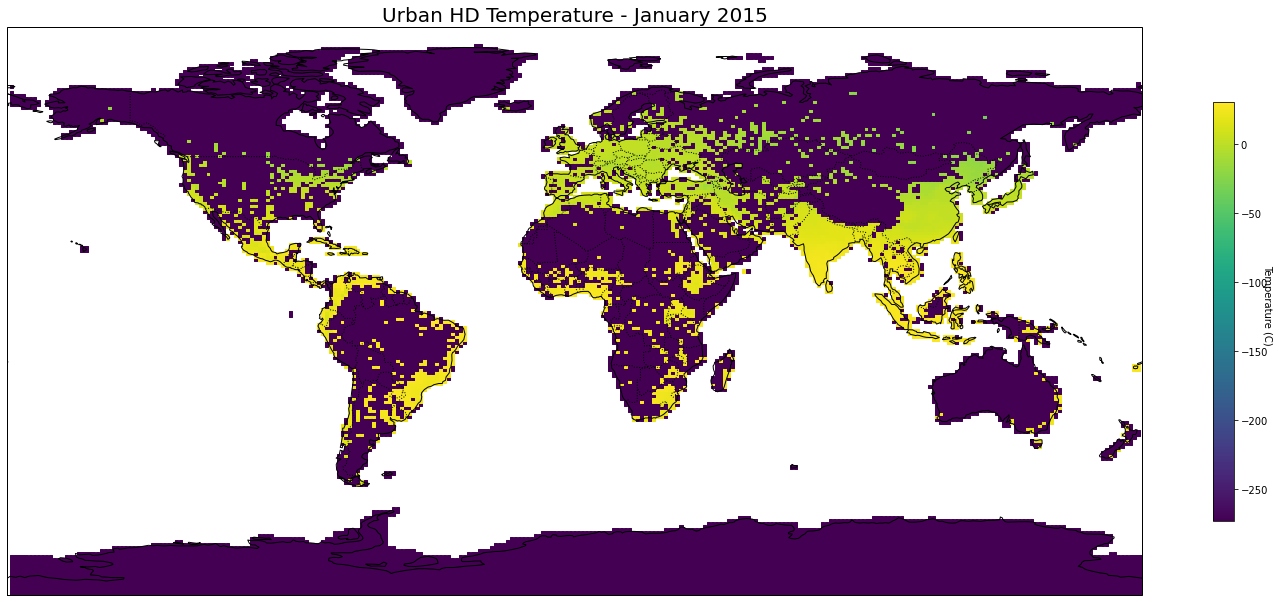

In [16]:
# Multiplied the TSA cube with the TSA weights cube and then summed (weighted mean)
fig, axes = plt.subplots(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.coastlines()

# Change these!!!!!!!!!!!
tsa_grid_weighted_HD = np.nansum((np.multiply(tsa_cube_HD, tsa_wtlunit_cube_HD)), axis=2) 
c = tsa_grid_weighted_HD - 273
np.save('tsa_grid_weighted_HD', tsa_grid_weighted_HD)

plt.scatter(lon_grid, lat_grid, c=c, transform=ccrs.PlateCarree(), s=10, marker="s")  

# Change Title !!!
plt.title("Urban HD Temperature - January 2015", size=20);
cbar = plt.colorbar(shrink=0.6)
cbar.set_label('Temperature (C)    ', rotation=270)

plt.tight_layout()
plt.savefig('UrbanHD_Jan2015.jpg')

# Urban Cube - MD

In [17]:
# Create mask for desired variable 
tsa = nc1.TSA.squeeze().where(nc1.pfts1d_itype_lunit==9)
wt = nc1.pfts1d_wtlunit.where(nc1.pfts1d_itype_lunit==9)
variable = tsa 

In [19]:
# TSA pft-lunit weight cube 
tsa_wtlunit_cube_MD = np.full((288,192,15), float("NaN")) 

for i in range(1,289): 
    for j in range(1,193):
        vmask = (np.isnan(variable.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j)) == False)
        v = wt[vmask].values
        for k in range(len(v)):
            tsa_wtlunit_cube_MD[i-1,j-1,k] = v[k]

np.save('tsa_wtlunit_cube_MD', tsa_wtlunit_cube_MD)

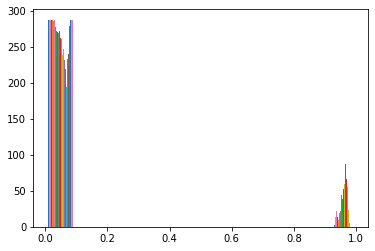

In [29]:
x = np.nansum(tsa_wtlunit_cube_MD, axis=2)
plt.hist(x)
plt.show()

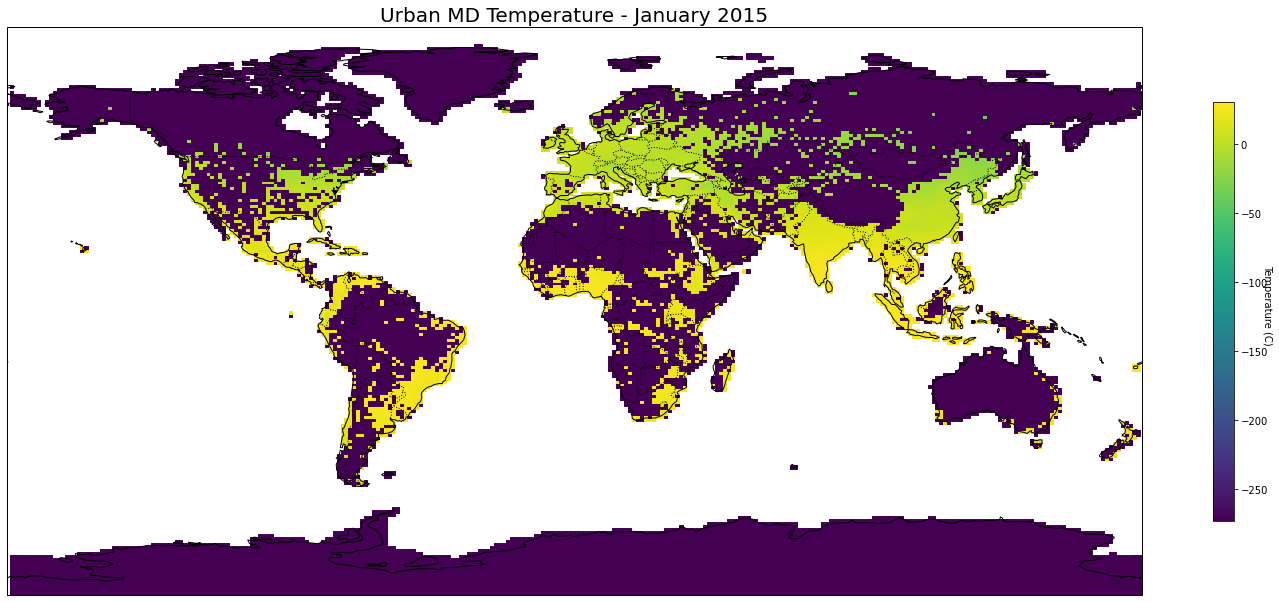

In [20]:
# Multiplied the TSA cube with the TSA weights cube and then summed (weighted mean)
fig, axes = plt.subplots(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.coastlines()

# Change these!!!!!!!!!!!
tsa_grid_weighted_MD = np.nansum((np.multiply(tsa_cube_MD, tsa_wtlunit_cube_MD)), axis=2) 
c = tsa_grid_weighted_MD - 273
np.save('tsa_grid_weighted_MD', tsa_grid_weighted_MD)

plt.scatter(lon_grid, lat_grid, c=c, transform=ccrs.PlateCarree(), s=10, marker="s")  

# Change Title !!!
plt.title("Urban MD Temperature - January 2015", size=20);
cbar = plt.colorbar(shrink=0.6)
cbar.set_label('Temperature (C)    ', rotation=270)

plt.tight_layout()
plt.savefig('UrbanMD_Jan2015.jpg')

should I combine TBD and MD and HD?? probably

think about how to stack 

# Combining Urban Cubes 

@ LEI this is where I am stuck 

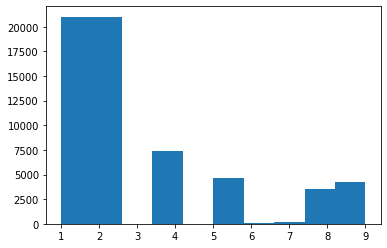

In [74]:
plt.hist(nc1.land1d_ityplunit)
plt.show()

In [75]:
# Urban TBD landunit weights to grid cell 
TBD = nc1.land1d_wtgcell.where(nc1.land1d_ityplunit==7)

#wtlunit_gcell_TBD = np.full((288,192,5), float("NaN"))

# check how many unique values per lat/lon

for i in range(1,289):
    for j in range(1,193):
        new_length = TBD.where(nc1.land1d_ixy==i).where(nc1.land1d_jxy==j).dropna(dim='landunit').values.size
        if new_length > max_length:
            max_length = new_length

print("Max values per grid cell =", max_length)

#np.save('wtlunit_gcell_TBD', wtlunit_gcell_TBD)

"""
for i in range(1,289):
    for j in range(1,193):
        new_length = TBD.where(nc1.land1d_ixy==i).where(nc1.land1d_jxy==j).dropna(dim='landunit').values.size
        if new_length > max_length:
            max_length = new_length

for i in range(1,289): 
    for j in range(1,193):
        vmask = (np.isnan(TBD.where(nc1.land1d_ixy==i).where(nc1.land1d_jxy==j)) == False)
        v = TBD[vmask].values
        for k in range(len(v)):
            wtlunit_gcell_TBD[i-1,j-1,k] = v[k]

for i in range(1,289): 
    for j in range(1,193):
        v = nc1.pfts1d_lat.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j).dropna(dim='pft').values
        #if v.size == 0: 
            #v = [float("NaN")]
        lat_grid[i-1,j-1] = v[0]
        
np.save('lat_grid', lat_grid)"""

Max values per unique lat/lon pair = 5


'\nfor i in range(1,289):\n    for j in range(1,193):\n        new_length = TBD.where(nc1.land1d_ixy==i).where(nc1.land1d_jxy==j).dropna(dim=\'landunit\').values.size\n        if new_length > max_length:\n            max_length = new_length\n\nfor i in range(1,289): \n    for j in range(1,193):\n        vmask = (np.isnan(TBD.where(nc1.land1d_ixy==i).where(nc1.land1d_jxy==j)) == False)\n        v = TBD[vmask].values\n        for k in range(len(v)):\n            wtlunit_gcell_TBD[i-1,j-1,k] = v[k]\n\nfor i in range(1,289): \n    for j in range(1,193):\n        v = nc1.pfts1d_lat.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j).dropna(dim=\'pft\').values\n        #if v.size == 0: \n            #v = [float("NaN")]\n        lat_grid[i-1,j-1] = v[0]\n        \nnp.save(\'lat_grid\', lat_grid)'

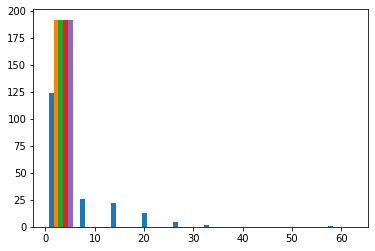

In [72]:
x = np.nansum(wtlunit_gcell_TBD, axis=0)
plt.hist(x)
plt.show()

In [ ]:
wtlunit_gcell_HD = nc1.land1d_ityplunit.where(nc1.land1d_ityplunit==8)


In [ ]:
wtlunit_gcell_MD = nc1.land1d_ityplunit.where(nc1.land1d_ityplunit==9)

# Old Code

In [12]:
# Extracting Rural TSA and corresponding lat/lon
rural_tsa = tsa[pfts1d_itype_lunit == 1]
rural_wt = pfts1d_wtgcell[pfts1d_itype_lunit == 1]
rural_lat = pfts1d_lat[pfts1d_itype_lunit == 1]
rural_lon = pfts1d_lon[pfts1d_itype_lunit == 1]

In [13]:
# Extracting Urban TSA and corresponding lat/lon
urban_tsa = tsa[pfts1d_itype_lunit > 6]
urban_lat = pfts1d_lat[pfts1d_itype_lunit > 6]
urban_lon = pfts1d_lon[pfts1d_itype_lunit > 6]

In [17]:
max(urban_tsa)

<xarray.DataArray 'TSA' ()>
array(303.8749, dtype=float32)
Coordinates:
    time     object 2015-02-01 00:00:00
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean

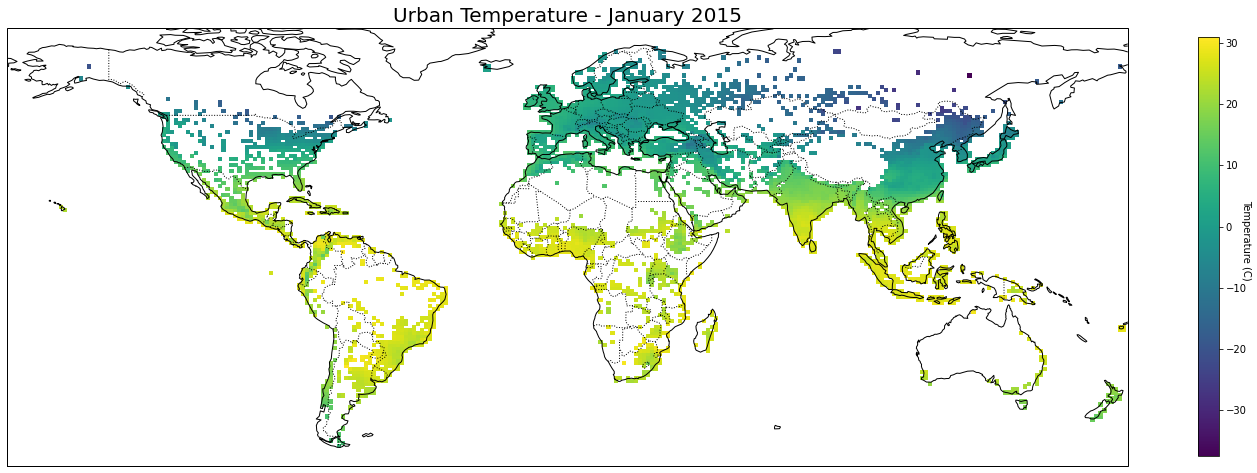

In [28]:
fig, axes = plt.subplots(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.coastlines()

plt.scatter(urban_lon, urban_lat, c=(urban_tsa-273), transform=ccrs.PlateCarree(), s=10, marker="s")  

plt.title("Urban Temperature - January 2015", size=20);
cbar = plt.colorbar(shrink=0.6)
cbar.set_label('Temperature (C)    ', rotation=270)

plt.tight_layout()
plt.savefig(r'D:\yello\Documents\Lab_UIUC\Practice_3.26.2020\Urban_Jan2015.jpg')


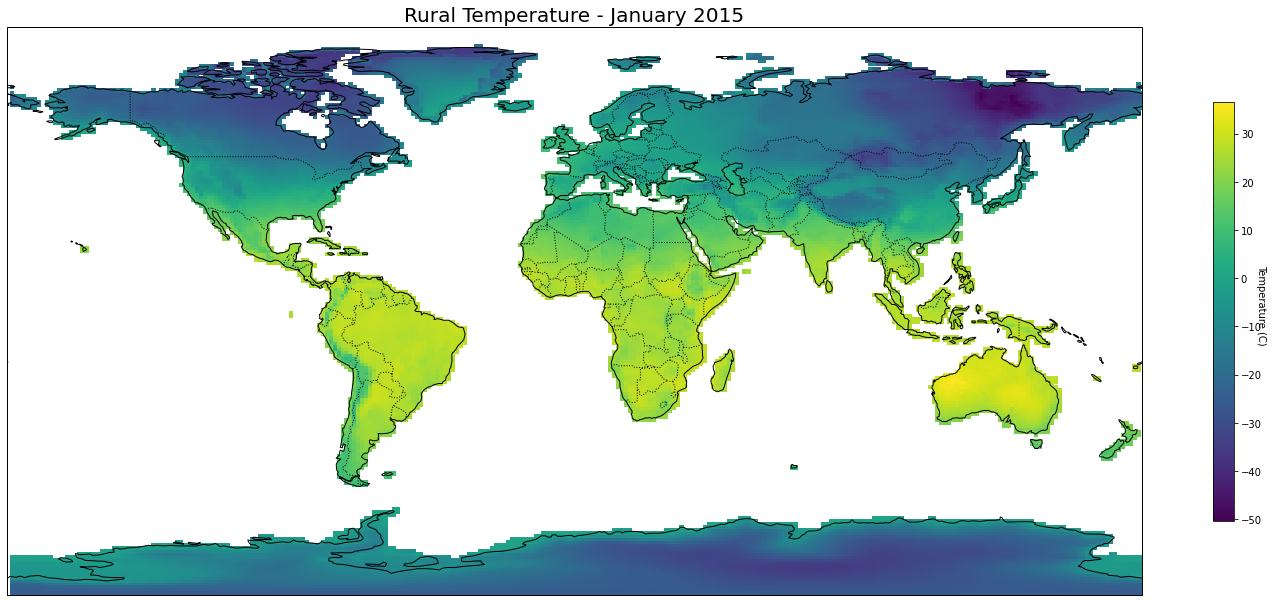

In [30]:
fig, axes = plt.subplots(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.coastlines()

plt.scatter(rural_lon, rural_lat, c=(rural_tsa-273), transform=ccrs.PlateCarree(), s=10, marker="s")  

plt.title("Rural Temperature - January 2015", size=20);
cbar = plt.colorbar(shrink=0.6)
cbar.set_label('Temperature (C)    ', rotation=270)

plt.tight_layout()

plt.savefig(r'D:\yello\Documents\Lab_UIUC\Practice_3.26.2020\Rural_Jan2015.jpg')


ValueError: arguments without labels along dimension 'pft' cannot be aligned because they have different dimension sizes: {315195, 39500}

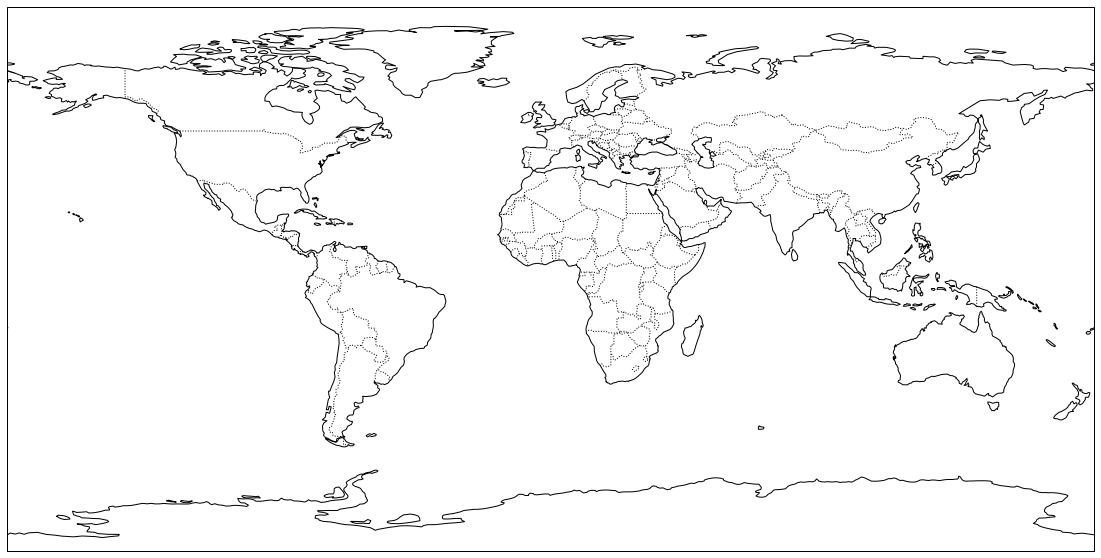

In [31]:
fig, axes = plt.subplots(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.coastlines()

plt.scatter(rural_lon, rural_lat, c=(urban_tsa - rural_tsa), transform=ccrs.PlateCarree(), s=10, marker="s")  

plt.title("UHI Temperature - January 2015", size=20);
cbar = plt.colorbar(shrink=0.6)
cbar.set_label('Temperature (C)    ', rotation=270)

plt.tight_layout()

# plt.savefig(r'D:\yello\Documents\Lab_UIUC\Practice_3.26.2020\UHI_Jan2015.jpg')


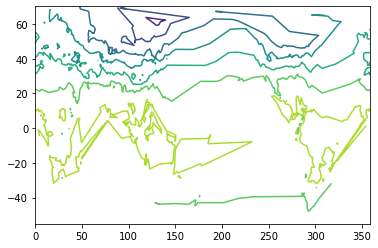

In [14]:
plt.tricontour(urban_lon, urban_lat, urban_tsa)

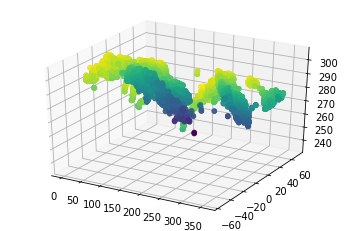

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
c = urban_tsa - 273
ax.scatter(urban_lon, urban_lat, urban_tsa, c=c)


In [39]:
del rural_tsa['time']

In [45]:
# wrong 
xr.merge([rural_tsa, rural_lon, rural_lat])

<xarray.Dataset>
Dimensions:     (pft: 315195)
Dimensions without coordinates: pft
Data variables:
    TSA         (pft) float32 ...
    pfts1d_lon  (pft) float64 ...
    pfts1d_lat  (pft) float64 ...

In [30]:
nc1.landfrac

<xarray.DataArray 'landfrac' (lat: 192, lon: 288)>
array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.25 357.5 358.75
  * lat      (lat) float32 -90.0 -89.057594 -88.11518 ... 89.057594 90.0
Attributes:
    long_name:  land fraction

In [27]:
rural = xr.concat([rural_lat, rural_lon], 'lat')

In [68]:
rural_tsa = rural_tsa.expand_dims('lon')
rural_tsa

<xarray.DataArray 'TSA' (lon: 1, lat: 1, pft: 315195)>
array([[[247.17212,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Dimensions without coordinates: lon, lat, pft
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean

In [17]:
empty = []
var = 0
for i in range(1,200):
    if (rural_lat[i] == rural_lat[i-1]) and (rural_lon[i] == rural_lon[i-1]):
        var += wt_rural_tsa
    else: 
        empty.append(var)
        var = 0

NameError: name 'wt_rural_tsa' is not defined

In [162]:
empty = []
var = 0
rural_lat = [1,1,1,2,3,4,5,9,9,9,9,9]
rural_lon = [1,1,2,2,3,4,6,1,2,5,4,4]
wt_rural_tsa = [0.1,0.05,0.5,0.22,0.31,.5,.4,.3,.1,.2,.3,.1]
for i in range(1,len(rural_lat)):
    if (rural_lat[i] == rural_lat[i-1]) and (rural_lon[i] == rural_lon[i-1]):
        print(wt_rural_tsa[i-1])
        var += wt_rural_tsa[i-1]
    else: 
        empty.append(var)
        var = 0

0.1
y
0.3
y


In [79]:
# wrong 
out = xr.vstack((rural_lat, rural_lon, rural_tsa))

AttributeError: module 'xarray' has no attribute 'vstack'

In [131]:
tsa[[0, 1, 2, 223925, 223926, 223927, 738172, 800120, 800152, 800153]]

<xarray.DataArray 'TSA' (pft: 10)>
array([247.17212,       nan,       nan, 281.0757 , 281.0757 , 281.0757 ,
       263.9483 ,       nan, 233.28204, 228.7623 ], dtype=float32)
Coordinates:
    time     object 2015-02-01 00:00:00
Dimensions without coordinates: pft
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean

In [106]:
rural_tsa = tsa[pfts1d_itype_lunit == 1]
print(rural_tsa)

<xarray.DataArray 'TSA' (pft: 315195)>
array([247.17212,       nan,       nan, ...,       nan,       nan,       nan],
      dtype=float32)
Coordinates:
    time     object 2015-02-01 00:00:00
Dimensions without coordinates: pft
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean


In [96]:
(pfts1d_itype_lunit > 6).sum()

<xarray.DataArray 'pfts1d_itype_lunit' ()>
array(39500)

In [113]:
print(np.where(pfts1d_itype_lunit > 6))
pfts1d_itype_lunit > 6

(array([223925, 223926, 223927, ..., 738172, 738173, 738174], dtype=int64),)


<xarray.DataArray 'pfts1d_itype_lunit' (pft: 800154)>
array([False, False, False, ..., False, False, False])
Dimensions without coordinates: pft

In [42]:
#tsa = xr.DataArray(nc1['TSA'].squeeze(), dims="pft", coords = {'pft': [nc1.pfts1d_lat, nc1.pfts1d_lon]})

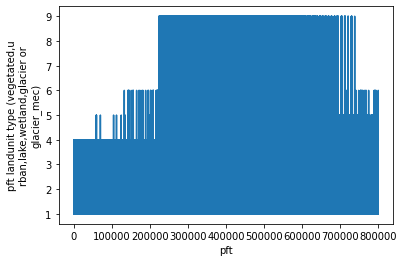

In [34]:
nc1.pfts1d_itype_lunit.plot()

In [13]:
"""fig, axes = plt.subplots(figsize=(20,10))
        
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))
ax.set_global()
ax.add_feature(cfeature.BORDERS, linestyle=':') # NEW 
ax.coastlines()

(nc['TSA_U']-nc['TSA_R']).squeeze().plot(transform=ccrs.PlateCarree(), cmap='seismic', vmin=-3.5, vmax=3.5)

plt.title("TSA UHI - Jan 2010", size=20);
"""

'fig, axes = plt.subplots(figsize=(20,10))\n        \nax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))\nax.set_global()\nax.add_feature(cfeature.BORDERS, linestyle=\':\') # NEW \nax.coastlines()\n\n(nc[\'TSA_U\']-nc[\'TSA_R\']).squeeze().plot(transform=ccrs.PlateCarree(), cmap=\'seismic\', vmin=-3.5, vmax=3.5)\n\nplt.title("TSA UHI - Jan 2010", size=20);\n'